In [11]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
def givens_rotation(a, b):
    if b == 0:
        return 1.0, 0.0
    else:
        r = np.hypot(a, b)
        c = a / r
        s = -b / r
        return c, s

In [3]:
def qr_givens(A):
    m, n = A.shape
    R = A.copy().astype(float)
    Q = np.eye(m)

    for j in range(n):
        for i in range(m-1, j, -1):
            a, b = R[i-1, j], R[i, j]
            c, s = givens_rotation(a, b)

            G = np.eye(m)
            G[[i-1, i], [i-1, i]] = c
            G[i-1, i] = -s
            G[i, i-1] = s
            R = G @ R

            Q = Q @ G.T

    return Q, R

In [15]:
def benchmark_and_plot_qr(max_size=512, step=64):
    sizes = list(range(4, max_size + 1, step))
    errors_givens, errors_numpy = [], []
    times_givens, times_numpy = [], []

    i = 0
    for size in sizes:
        A = np.random.rand(size, size)

        # Givens QR
        start = time.time()
        Q_g, R_g = qr_givens(A)
        time_g = time.time() - start
        err_g = np.sum(np.abs(A - Q_g @ R_g))

        # NumPy QR
        start = time.time()
        Q_np, R_np = np.linalg.qr(A)
        time_np = time.time() - start
        err_np = np.sum(np.abs(A - Q_np @ R_np))

        errors_givens.append(err_g)
        errors_numpy.append(err_np)
        times_givens.append(time_g)
        times_numpy.append(time_np)
        
        i += 1
        
        if i % 10 == 0:
            print(f"Iteration {i} done")


    # Plotting errors
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(sizes, errors_givens, marker='o', label='Givens QR')
    plt.plot(sizes, errors_numpy, marker='x', label='NumPy QR')
    plt.title('Suma błędów bezwzględnych ||A - QR||')
    plt.xlabel('Rozmiar macierzy')
    plt.ylabel('Suma błędów')
    plt.legend()
    plt.grid(True)

    # Plotting execution times
    plt.subplot(1, 2, 2)
    plt.plot(sizes, times_givens, marker='o', label='Givens QR')
    plt.plot(sizes, times_numpy, marker='x', label='NumPy QR')
    plt.title('Czas wykonania algorytmu')
    plt.xlabel('Rozmiar macierzy')
    plt.ylabel('Czas [s]')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

In [4]:
def verify_reconstruction(Q, R, A):
    A_reconstructed = Q @ R
    return np.allclose(A, A_reconstructed)

def verify_orthogonality(Q):
    I = np.eye(Q.shape[1])
    return np.allclose(Q.T @ Q, I)

def verify_upper_triangular(R):
    return np.allclose(R, np.triu(R))

In [5]:
A = np.array([
    [1.0, 2.0, 3.0, 4.0, 5.0],
    [6.0, 7.0, 8.0, 9.0, 10.0],
    [11.0, 12.0, 13.0, 14.0, 15.0],
    [16.0, 17.0, 18.0, 19.0, 20.0]
])

In [6]:
Q, R = qr_givens(A)

In [8]:
print("Matrix Q (orthogonal):")
print(Q)
print("\nMatrix R (upper triangular):")
print(R)

Matrix Q (orthogonal):
[[ 0.04914732  0.83521527  0.0342105   0.54665313]
 [ 0.29488391  0.46156633  0.36183718 -0.75436984]
 [ 0.54062051  0.0879174  -0.82630587 -0.13121971]
 [ 0.7863571  -0.28573154  0.43025818  0.33893642]]

Matrix R (upper triangular):
[[ 2.03469899e+01  2.20179988e+01  2.36890076e+01  2.53600165e+01
   2.70310253e+01]
 [-2.32789714e-16  1.09896746e+00  2.19793491e+00  3.29690237e+00
   4.39586982e+00]
 [-1.63337238e-16  5.72051075e-18  1.79213625e-15  3.66972621e-15
   3.07663465e-15]
 [ 3.21455604e-16 -3.73018420e-17 -7.27983372e-33  1.61053657e-16
   7.75939572e-16]]


In [9]:
print("\nVerification Results:")
print("Reconstruction A ≈ Q @ R:", verify_reconstruction(Q, R, A))
print("Q is orthogonal (Q.T @ Q ≈ I):", verify_orthogonality(Q))
print("R is upper triangular:", verify_upper_triangular(R))


Verification Results:
Reconstruction A ≈ Q @ R: True
Q is orthogonal (Q.T @ Q ≈ I): True
R is upper triangular: True


In [10]:
# Compare with NumPy's QR decomposition
Q_np, R_np = np.linalg.qr(A)
print("\nNumPy Q:")
print(Q_np)
print("\nNumPy R:")
print(R_np)


NumPy Q:
[[-0.04914732 -0.83521527  0.54170709  0.08095328]
 [-0.29488391 -0.46156633 -0.78261513  0.29582692]
 [-0.54062051 -0.0879174  -0.05989101 -0.83451367]
 [-0.7863571   0.28573154  0.30079905  0.45773347]]

NumPy R:
[[-2.03469899e+01 -2.20179988e+01 -2.36890076e+01 -2.53600165e+01
  -2.70310253e+01]
 [ 0.00000000e+00 -1.09896746e+00 -2.19793491e+00 -3.29690237e+00
  -4.39586982e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.11022302e-15  6.21724894e-16
  -2.04281037e-15]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  8.88178420e-17
  -1.24344979e-15]]


Iteration 10 done
Iteration 20 done
Iteration 30 done
Iteration 40 done
Iteration 50 done
Iteration 60 done
Iteration 70 done
Iteration 80 done
Iteration 90 done
Iteration 100 done
Iteration 110 done
Iteration 120 done
Iteration 130 done
Iteration 140 done
Iteration 150 done
Iteration 160 done
Iteration 170 done
Iteration 180 done
Iteration 190 done
Iteration 200 done
Iteration 210 done
Iteration 220 done
Iteration 230 done
Iteration 240 done
Iteration 250 done


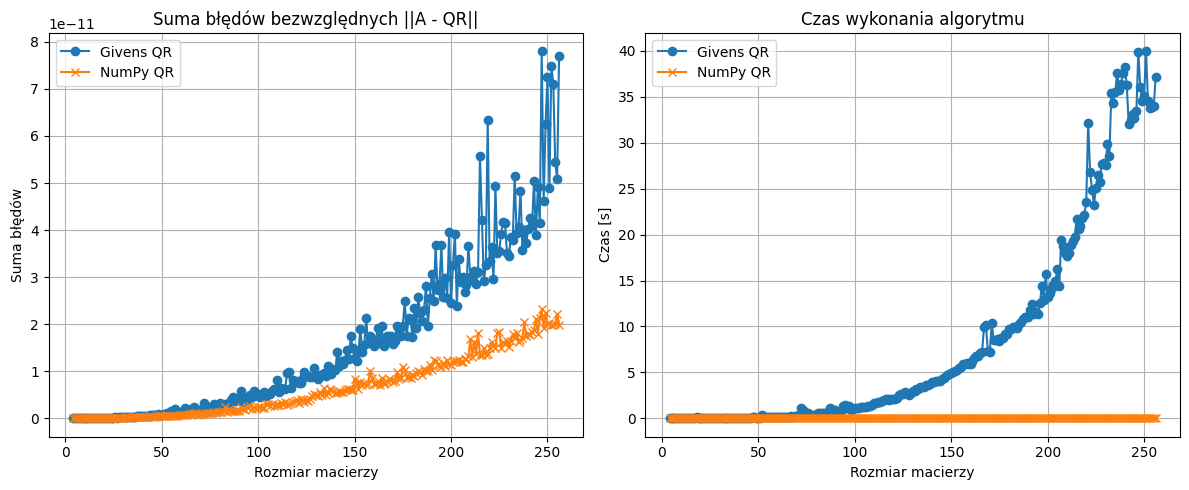

In [17]:
benchmark_and_plot_qr(256, 1)